In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
ds = keras.datasets.cifar10
(train_images,train_labels),(test_images,test_labels)=ds.load_data()

In [4]:
train_images.shape

(50000, 32, 32, 3)

In [5]:
classification = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

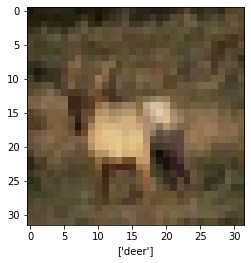

In [6]:
plt.figure()
plt.imshow(train_images[3])
plt.xlabel(classification[train_labels[3]])
plt.show()

Woah!HOw is that a deer....

In [7]:
train_images = train_images/255
test_images = test_images/255

In [18]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.2))


model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 64)         

In [19]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
model.fit(train_images,train_labels,epochs=6,batch_size=100)

Epoch 1/6
500/500 [==============================] - 147s 294ms/step - loss: 0.7197 - accuracy: 0.7451
Epoch 2/6
500/500 [==============================] - 150s 300ms/step - loss: 0.6790 - accuracy: 0.7597
Epoch 3/6
500/500 [==============================] - 150s 299ms/step - loss: 0.6486 - accuracy: 0.7697
Epoch 4/6
500/500 [==============================] - 148s 297ms/step - loss: 0.6103 - accuracy: 0.7851
Epoch 5/6
500/500 [==============================] - 151s 301ms/step - loss: 0.5965 - accuracy: 0.7891
Epoch 6/6
500/500 [==============================] - 149s 298ms/step - loss: 0.5565 - accuracy: 0.8029


In [24]:
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=1)
print("accuracy : " , test_acc)

313/313 [==============================] - 9s 27ms/step - loss: 0.6819 - accuracy: 0.7673
accuracy :  0.767300009727478


In [25]:
test_images.shape

(10000, 32, 32, 3)

In [26]:
predictions = model.predict(test_images)

Enter a number in the range [0,10000) 
789
Prediction by model :  ship


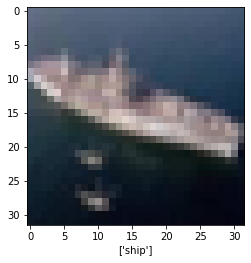


Correct Prediction
Would You like to continue?
Enter 0 to exit 
1
Enter a number in the range [0,10000) 
3748
Prediction by model :  dog


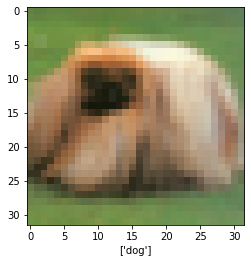


Correct Prediction
Would You like to continue?
Enter 0 to exit 
1
Enter a number in the range [0,10000) 
7645
Prediction by model :  airplane


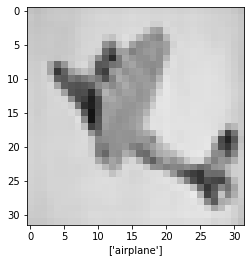


Correct Prediction
Would You like to continue?
Enter 0 to exit 
1
Enter a number in the range [0,10000) 
847
Prediction by model :  airplane


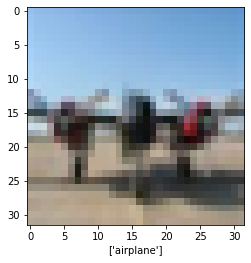


Correct Prediction
Would You like to continue?
Enter 0 to exit 
0


In [27]:
ans=1
while(ans!=0):
  print("Enter a number in the range [0,10000) ")
  n = int(input())
  print("Prediction by model : ",classification[np.argmax(predictions[n])])
  plt.figure()
  plt.imshow(test_images[n])
  plt.xlabel(classification[test_labels[n]])
  plt.show()
  if(classification[np.argmax(predictions[n])]==classification[test_labels[n]]):
    print("\nCorrect Prediction")
  else:
    print("\nWrong Prediction")
  print("Would You like to continue?\nEnter 0 to exit ")
  ans=int(input())
